# Mutant Moneyball Tidy Data Project

This project will showcase my abilities to reshape a data set as desired and clean it up for basic exploratory data analysis. The dataset I will be using is Mutant Moneyball adapted from github [here](https://github.com/EliCash82/mutantmoneyball/tree/main). 

### Data Cleaning

My first step will be to reshape the the data so that the content is easier to read. This means adhering to the tidy data principles where each observation is its own row and each piece of information is stored in its own variable/column. Thus, I need to melt the data into tidy format and collect the values into a value column. I then need to split the decades from the sources and make each of these their own column. I cleaned up the Decade column so that it was an integer and could be analyzed and got rid of the dollar signs and commas in the Total_Value column so I could convert the values to floats. Finally, I sorted the data by member and decade so that when looking at the data each observational unit (member of the X-men) has their own mini table of values sorted by decade. 

In [72]:
# importing necessary libraries
import pandas as pd 

# reading in data from csv file
mutants = pd.read_csv('mutant_moneyball.csv')

# melting the data
mutants = pd.melt(mutants, id_vars=['Member'], var_name='Temporary', value_name = 'Total_Value')

# cleaning up the Total Value column
mutants['Total_Value'] = mutants['Total_Value'].astype(str).str.replace('$', '').str.replace(',', '')
mutants['Total_Value'] = mutants['Total_Value'].astype(float)

# splitting the Temporary column into two columns, dropping the Temporary column, and cleaning Decade into an integer value
mutants[['Decade', 'Source']] = mutants['Temporary'].str.split('_', expand=True)
mutants.drop(columns=['Temporary'], inplace=True)
mutants['Decade'] = mutants['Decade'].str.replace('TotalValue', '').str.replace('s', '').astype(int)

# sorting by member, decade, and source
mutants.sort_values(by=['Member', 'Decade'], inplace=True)

# printing first 30 observations of the data frame to check
print(mutants.head(30))

           Member  Total_Value  Decade    Source
5     alexSummers      34519.0      60  heritage
109   alexSummers        745.0      60      ebay
213   alexSummers        342.0      60       wiz
317   alexSummers       1850.0      60   oStreet
31    alexSummers     144946.0      70  heritage
135   alexSummers       2703.0      70      ebay
239   alexSummers        597.0      70       wiz
343   alexSummers       3865.0      70   oStreet
57    alexSummers       9352.0      80  heritage
161   alexSummers        581.0      80      ebay
265   alexSummers        253.0      80       wiz
369   alexSummers        502.0      80   oStreet
83    alexSummers        197.0      90  heritage
187   alexSummers         21.0      90      ebay
291   alexSummers         19.0      90       wiz
395   alexSummers         24.0      90   oStreet
18   alisonBlaire          NaN      60  heritage
122  alisonBlaire          NaN      60      ebay
226  alisonBlaire          NaN      60       wiz
330  alisonBlaire   

### Visualization

In this section, I will do some basic visualizations to look at our newly cleaned data and explore some of the relationships. 


Text(0, 0.5, 'Total Valuation in Millions($)')

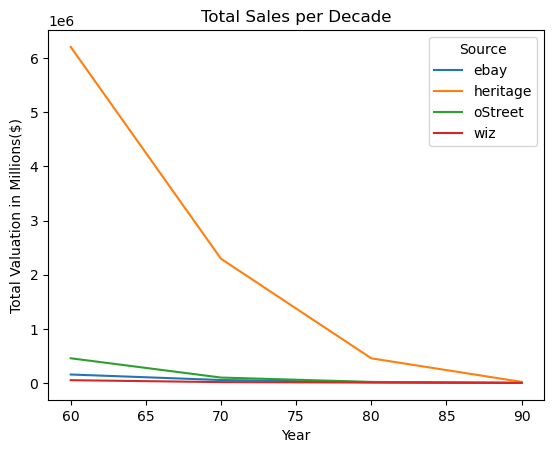

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# using pivot table to get the total sales per decade and then plotting it
mutants_decade_total = (pd.pivot_table(mutants, index = 'Decade', values = 'Total_Value', columns = 'Source', aggfunc = 'sum').reset_index()
                        .melt(id_vars = 'Decade', var_name = 'Source', value_name = 'Total_Value'))
sns.lineplot(data=mutants_decade_total, x = "Decade", y = "Total_Value", hue = 'Source')

# adding title and labels to the plot
plt.title("Total Sales per Decade")
plt.xlabel("Year")
plt.ylabel("Total Valuation in Millions($)")

In the above graph, we can see how total sales has declined over time, with comic books perhaps becoming less popular over time as TVs entered the limelight. I used the pivot table function to sum the data at the decade level by source and then plotted this in a line plot to show this decline. 


Text(0, 0.5, 'Total S in Millions ($)')

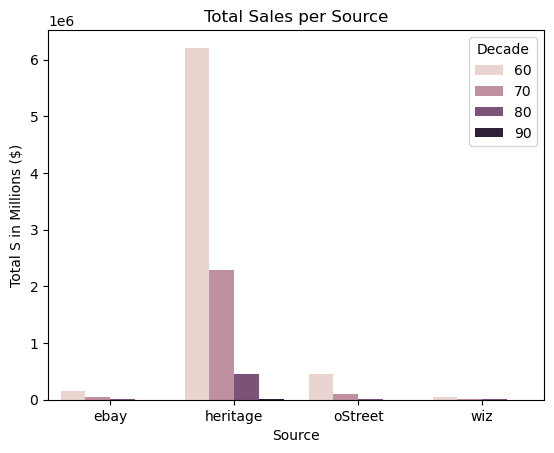

In [74]:
# using pivot table to get the total sales per source and then plotting it
mutants_source_total = (pd.pivot_table(mutants, index = 'Source', values = 'Total_Value', columns = "Decade", aggfunc = 'sum').reset_index()
                        .melt(id_vars = 'Source', var_name = 'Decade', value_name = 'Total_Value'))
sns.barplot(data=mutants_source_total, x = "Source", y = "Total_Value", hue = 'Decade')

# adding title and labels to the plot
plt.title("Total Sales per Source")
plt.xlabel("Source")
plt.ylabel("Total S in Millions ($)")

In the above graph, I again show the decline of sales but here it is a little easier to compare a certain source-decade pair to others and it visualizes the volume of sales by heritage compared to the other sources. I once again use pivot table but with decade and source switched to fit the visualization. 